# Data Preprocessing

In [33]:
#importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
#importing the data
data = pd.read_csv("./KaggleV2-May-2016.csv")
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Observation: We can see there are a few spelling mistakes in the headings of the columns.

In [35]:
# renaming the column names which are miss spelt.
data.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicap', 'ScheduledDay': 'ScheduledDate',
                  'AppointmentDay': 'AppointmentDate'},inplace=True)

# 1. Data Exploration

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PatientId        110527 non-null  float64
 1   AppointmentID    110527 non-null  int64  
 2   Gender           110527 non-null  object 
 3   ScheduledDate    110527 non-null  object 
 4   AppointmentDate  110527 non-null  object 
 5   Age              110527 non-null  int64  
 6   Neighbourhood    110527 non-null  object 
 7   Scholarship      110527 non-null  int64  
 8   Hypertension     110527 non-null  int64  
 9   Diabetes         110527 non-null  int64  
 10  Alcoholism       110527 non-null  int64  
 11  Handicap         110527 non-null  int64  
 12  SMS_received     110527 non-null  int64  
 13  No-show          110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Observation: From data.info() we can see that PatientId is of float type (so we need to check for row with float patientID's values and delete them)

In [37]:
data = data[data['PatientId'].apply(lambda x: x.is_integer()) == True]

In [38]:
data['PatientId'] = data['PatientId'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110522 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   PatientId        110522 non-null  int64 
 1   AppointmentID    110522 non-null  int64 
 2   Gender           110522 non-null  object
 3   ScheduledDate    110522 non-null  object
 4   AppointmentDate  110522 non-null  object
 5   Age              110522 non-null  int64 
 6   Neighbourhood    110522 non-null  object
 7   Scholarship      110522 non-null  int64 
 8   Hypertension     110522 non-null  int64 
 9   Diabetes         110522 non-null  int64 
 10  Alcoholism       110522 non-null  int64 
 11  Handicap         110522 non-null  int64 
 12  SMS_received     110522 non-null  int64 
 13  No-show          110522 non-null  object
dtypes: int64(9), object(5)
memory usage: 12.6+ MB


In [39]:
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105220e+05,1.105220e+05,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000
mean,1.475029e+14,5.675304e+06,37.089267,0.098270,0.197255,0.071859,0.030401,0.022249,0.321031
std,2.560988e+14,7.129627e+04,23.110487,0.297681,0.397928,0.258255,0.171689,0.161546,0.466875
min,5.628261e+06,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.173345e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.174215e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439381e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [40]:
'''
No show analysis:
Close to 20% percentage of records have No Show's
unique values 2
'''
data['No-show'].describe()

count     110522
unique         2
top           No
freq       88203
Name: No-show, dtype: object

In [41]:
'''
2 genders
35% are Male
65% are Female
'''
data['Gender'].describe()

count     110522
unique         2
top            F
freq       71837
Name: Gender, dtype: object

In [43]:
'''
scheduled days are very different
this is because there is time stamp along with schedule day, this makes the schedule day different
'''
data['ScheduledDate'].describe()

count                   110522
unique                  103544
top       2016-05-06T07:09:54Z
freq                        24
Name: ScheduledDate, dtype: object

Observation: From data.describe() we can observe the min value in age is -1 and max value in handicap is 4. So lets check the unique values in columns

In [44]:
print(data.apply(lambda col: sorted(col.unique())))

PatientId          [5628261, 11831856, 22638656, 52168938, 542239...
AppointmentID      [5030230, 5122866, 5134197, 5134220, 5134223, ...
Gender                                                        [F, M]
ScheduledDate      [2015-11-10T07:13:56Z, 2015-12-03T08:17:28Z, 2...
AppointmentDate    [2016-04-29T00:00:00Z, 2016-05-02T00:00:00Z, 2...
Age                [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...
Neighbourhood      [AEROPORTO, ANDORINHAS, ANTÔNIO HONÓRIO, ARIOV...
Scholarship                                                   [0, 1]
Hypertension                                                  [0, 1]
Diabetes                                                      [0, 1]
Alcoholism                                                    [0, 1]
Handicap                                             [0, 1, 2, 3, 4]
SMS_received                                                  [0, 1]
No-show                                                    [No, Yes]
dtype: object


Observation: we can se that age has -1 values and handicap has 2,3,4 values. Need to delete rows with that false data

In [45]:
# Deleting rows with value handcap > 1
data = data[data['Handicap'] <= 1]
# Deleting rows with value age < 0
data = data[data['Age'] >= 0]
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.103220e+05,1.103220e+05,110322.000000,110322.000000,110322.000000,110322.000000,110322.000000,110322.000000,110322.000000
mean,1.475311e+14,5.675297e+06,37.071146,0.098285,0.196842,0.071599,0.030384,0.018509,0.321187
std,2.561427e+14,7.129935e+04,23.098334,0.297701,0.397614,0.257825,0.171642,0.134785,0.466935
min,5.628261e+06,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.175523e+12,5.640280e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.175471e+13,5.680566e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439381e+13,5.725508e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
data['Hypertension'].describe() # 19% patients have Hipertension
data['Diabetes'].describe() # 7% patients have Diabetes
data['Alcoholism'].describe() # 3% patients have Alcoholism
data['Handicap'].describe() # 2% patients have Alcoholism

data['SMS_received'].describe() # 32% patients have received sms

data['Scholarship'].describe() # 9% patients have Scholarship

count    110322.000000
mean          0.098285
std           0.297701
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Scholarship, dtype: float64

In [47]:
## finding missing values in coloums 
data.isna().sum()

PatientId          0
AppointmentID      0
Gender             0
ScheduledDate      0
AppointmentDate    0
Age                0
Neighbourhood      0
Scholarship        0
Hypertension       0
Diabetes           0
Alcoholism         0
Handicap           0
SMS_received       0
No-show            0
dtype: int64

In [48]:
## validating ScheduledDay and AppointmentDay colums
# appointment date should be greater than scheduleday so, we need to delete the negative values in the waitingdays
data['ScheduledDate'] = pd.to_datetime(data['ScheduledDate'])
data['AppointmentDate'] = pd.to_datetime(data['AppointmentDate'])
data['WaitingDays'] = ((data['AppointmentDate'] - data['ScheduledDate']).dt.days)+1 
#lets check if there is any negative values in the WaitingDays column
data.query('WaitingDays < 0')

,PatientId,AppointmentID,Gender,ScheduledDate,AppointmentDate,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,WaitingDays
27033,7839272661752,5679978,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,7896293967868,5715660,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,24252258389979,5664962,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,998231581612122,5686628,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,3787481966821,5655637,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


Observation: we can see there are 5 rows in the WaitingDays column. So, we need to delete those rows

In [49]:
data = data[data['WaitingDays'] >= 0]

In [50]:
#convert Gender column into 0's and 1's where M = 1 and F = 0
data['Gender'].replace('F', 0, inplace=True)
data['Gender'].replace('M', 1, inplace=True)
#convert No-show column into 0's and 1's where Yes = 1 and No = 0
data['No-show'].replace('No', 0, inplace=True)
data['No-show'].replace('Yes', 1, inplace=True)

# Normalize the data (Pre-Processing)
# Using label encoder as opposed to one-hot encoding as there are only 2 states we have Female/Male, N/Y
# labelTransformer = preprocessing.LabelEncoder()

# data['Gender'] = data['Gender'].astype('str')
# data['Gender'] = labelTransformer.fit_transform(data['Gender'])
# data['No-show'] = data['No-show'].astype('str')
# data['No-show'] = labelTransformer.fit_transform(data['No-show'])

In [51]:
data['AppointmentDayofweek'] = data['AppointmentDate'].dt.dayofweek
data['ScheduledDayofweek'] = data['ScheduledDate'].dt.dayofweek

In [52]:
data['AppointmentID'].value_counts()

5642903    1
5697808    1
5647491    1
5675609    1
5716112    1
          ..
5424230    1
5720832    1
5626441    1
5683964    1
5629448    1
Name: AppointmentID, Length: 110317, dtype: int64

we can observe that AppointmentID is unique. So we can delete the colum

In [53]:
#drop the AppointmentId 
data = data.drop(['AppointmentID'], axis=1)

In [54]:
data['PatientId'].value_counts()

822145925426128    88
99637671331        84
26886125921145     70
33534783483176     65
75797461494159     62
                   ..
1428929271841       1
652239188977        1
943887198925151     1
12686695897657      1
15576631729893      1
Name: PatientId, Length: 62185, dtype: int64

We can observe that same patient has multimple appoinments but the patient with multiple appointments has very few so lets drop the columns

In [55]:
#drop the PatientId 
data = data.drop(['PatientId'], axis=1)

array([[<AxesSubplot: title={'center': 'Gender'}>,
        <AxesSubplot: title={'center': 'ScheduledDate'}>,
        <AxesSubplot: title={'center': 'AppointmentDate'}>,
        <AxesSubplot: title={'center': 'Age'}>],
       [<AxesSubplot: title={'center': 'Scholarship'}>,
        <AxesSubplot: title={'center': 'Hypertension'}>,
        <AxesSubplot: title={'center': 'Diabetes'}>,
        <AxesSubplot: title={'center': 'Alcoholism'}>],
       [<AxesSubplot: title={'center': 'Handicap'}>,
        <AxesSubplot: title={'center': 'SMS_received'}>,
        <AxesSubplot: title={'center': 'No-show'}>,
        <AxesSubplot: title={'center': 'WaitingDays'}>],
       [<AxesSubplot: title={'center': 'AppointmentDayofweek'}>,
        <AxesSubplot: title={'center': 'ScheduledDayofweek'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

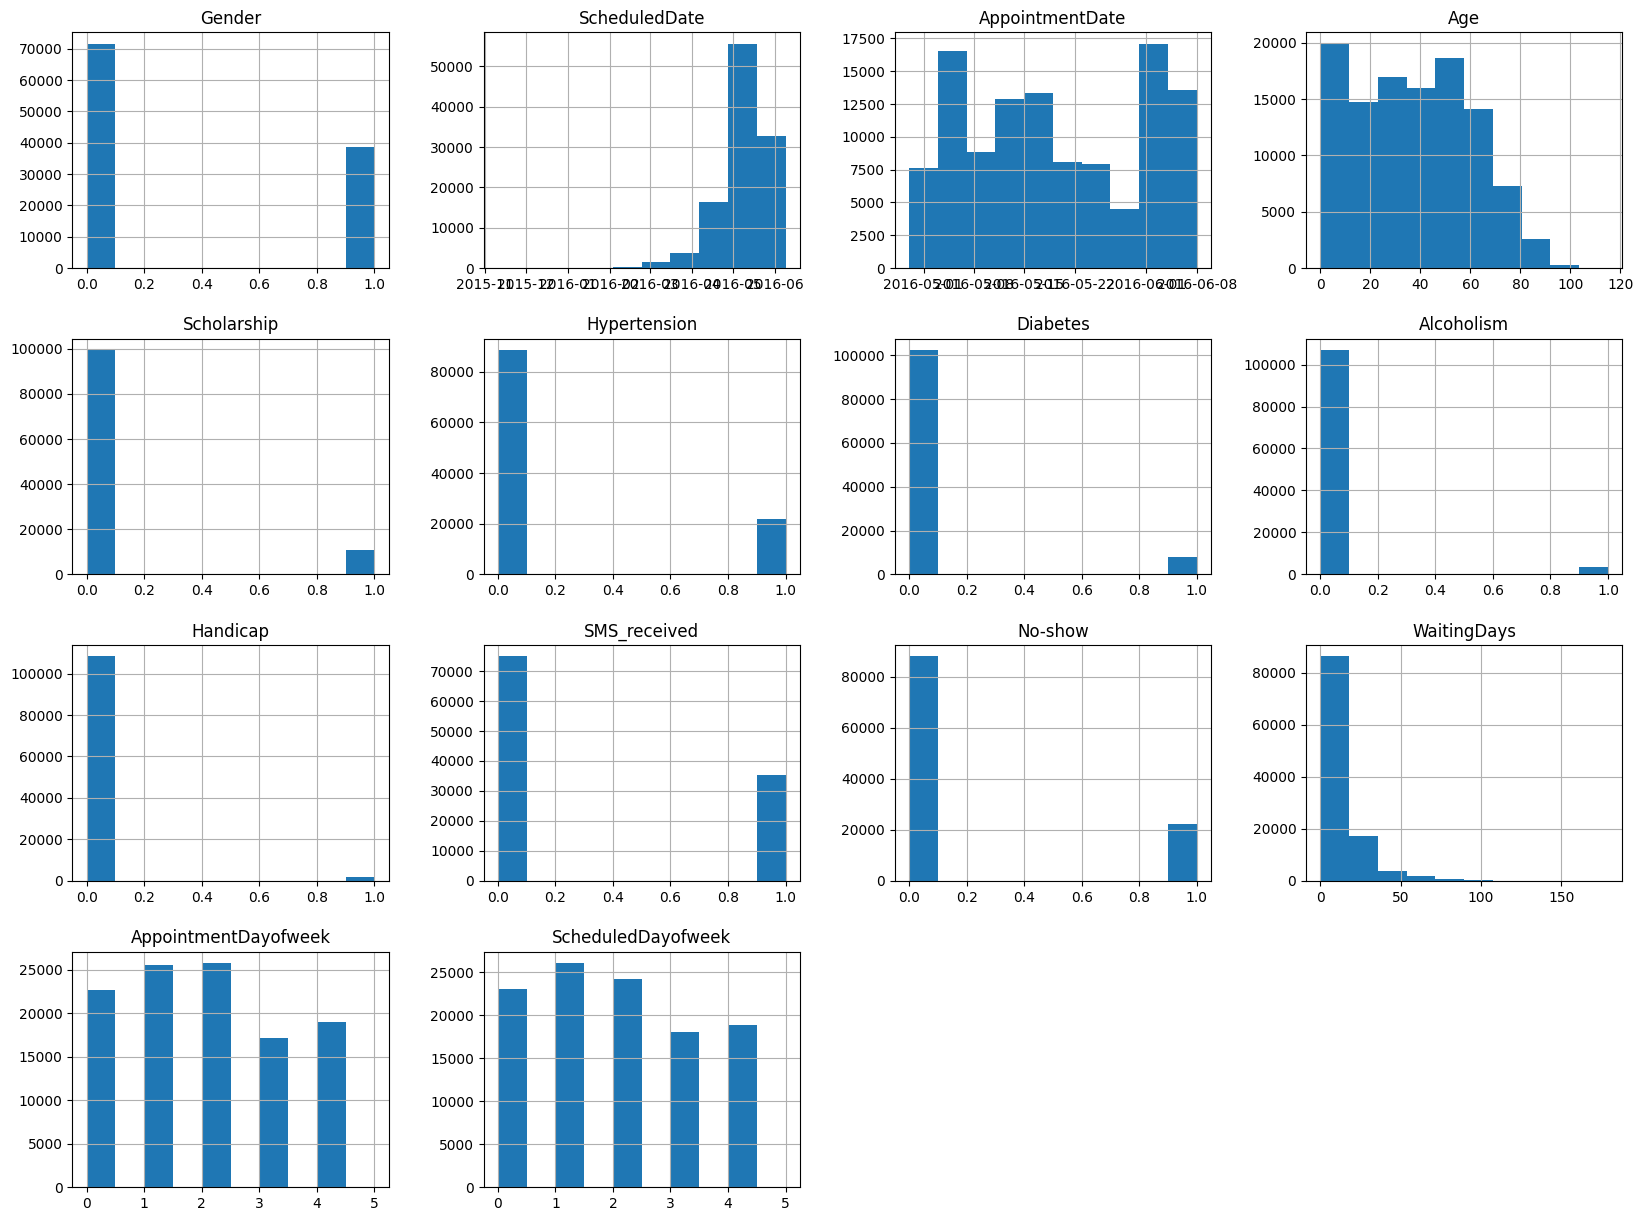

In [56]:
#ploting distribution of variables 
data.hist(figsize=(20,15))

In [57]:
# from pandas.plotting import scatter_matrix
# scatter_matrix(data)
# plt.show(figsize=(20,15))
#using this we can plot scatter matrix: relation between each variable w.r.t other variable

In [58]:
#ploting co-relation matrix
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

/var/folders/08/k4r8wxcs0617l9gr87vj2_h00000gn/T/ipykernel_93620/2093119777.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,WaitingDays,AppointmentDayofweek,ScheduledDayofweek
Gender,1.000000,-0.106831,-0.114301,-0.055979,-0.032758,0.105900,0.020645,-0.046328,-0.003974,-0.028477,0.003931,0.005126
Age,-0.106831,1.000000,-0.092131,0.503689,0.291780,0.095686,0.082040,0.012778,-0.060797,0.034921,0.003290,0.011677
Scholarship,-0.114301,-0.092131,1.000000,-0.019256,-0.024610,0.035219,-0.009156,0.001188,0.029416,-0.030536,-0.000605,-0.004981
Hypertension,-0.055979,0.503689,-0.019256,1.000000,0.432300,0.088080,0.081466,-0.006260,-0.036146,-0.017222,0.003503,0.000982
Diabetes,-0.032758,0.291780,-0.024610,0.432300,1.000000,0.018637,0.054785,-0.014771,-0.015135,-0.027155,0.006549,-0.000030
Alcoholism,0.105900,0.095686,0.035219,0.088080,0.018637,1.000000,0.003142,-0.026089,-0.000233,-0.038661,0.002467,0.006781
Handicap,0.020645,0.082040,-0.009156,0.081466,0.054785,0.003142,1.000000,-0.023956,-0.008025,-0.020361,0.005009,0.001702
SMS_received,-0.046328,0.012778,0.001188,-0.006260,-0.014771,-0.026089,-0.023956,1.000000,0.126750,0.398486,-0.090054,0.078303
No-show,-0.003974,-0.060797,0.029416,-0.036146,-0.015135,-0.000233,-0.008025,0.126750,1.000000,0.186144,0.001477,0.006156
WaitingDays,-0.028477,0.034921,-0.030536,-0.017222,-0.027155,-0.038661,-0.020361,0.398486,0.186144,1.000000,-0.011589,0.014565


In [59]:
#Before building the model we need to convert all columns into integer to make model accurate
#Spliting date into year month and day
data['ScheduledYear'] = data['ScheduledDate'].dt.year
data['ScheduledMonth'] = data['ScheduledDate'].dt.month
data['ScheduledDate'] = data['ScheduledDate'].dt.day
data['AppointmentYear'] = data['AppointmentDate'].dt.year
data['AppointmentMonth'] = data['AppointmentDate'].dt.month
data['AppointmentDate'] = data['AppointmentDate'].dt.day

In [60]:
#we need to convert Neighbourhood into integer by encoding
#lets check the number of unique values
data['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [61]:
#encoding Neighbourhood so that all columns will be in integers
# encoded = pd.get_dummies(data['Neighbourhood'], prefix = 'N')
# data = pd.concat([data, encoded], axis=1)
# commenting because encoding Neighbourhood the GaussianNB model has very less accuracy. 
#So deleting the column for better results
#and chaning the position of N0-show to last to make spliting easy
data['NoShow'] = data['No-show']
data = data.drop(['No-show', 'Neighbourhood'], axis=1)

# 2. Building Model and evaluation

In [24]:
#spliting dependent variables and target variable 
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [25]:
#importing the required models from the sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

#appending all models into models list so that we can loop all models
models = []
models.append(('Logistic Regression', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('Naïve Bayes', GaussianNB()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')))

Logistic Regression:
Accuracy: 0.7942836553508739
Precision: 0.32954279415364496
Recall: 0.01843725736109261
F1 score: 0.03490010807758172
AUC 0.6612460766749247


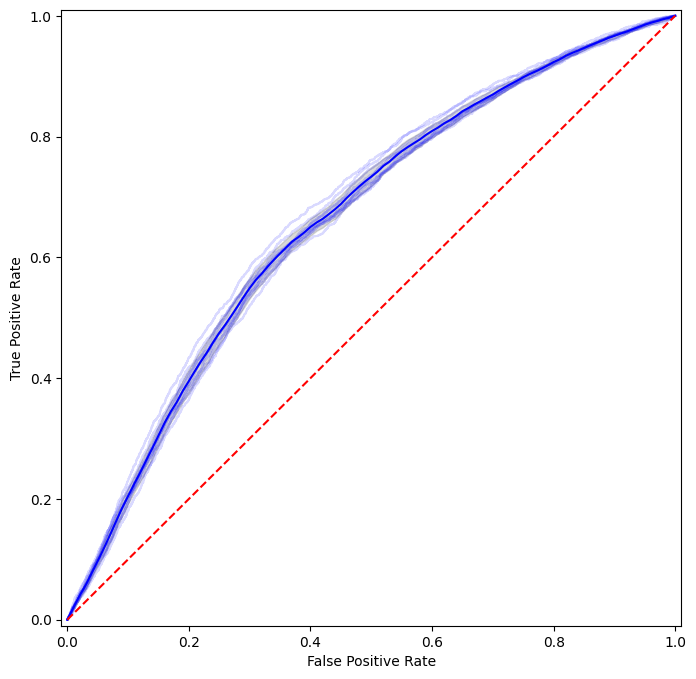

Naïve Bayes:
Accuracy: 0.7704432705272747
Precision: 0.33791524143410556
Recall: 0.14285308491699872
F1 score: 0.20069854564491657
AUC 0.6427432395903566


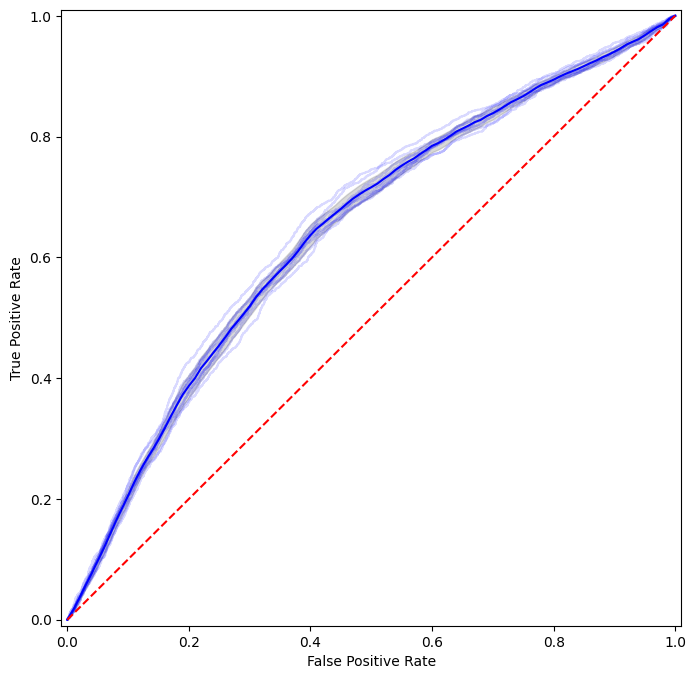

Decision Tree:
Accuracy: 0.7426053547491481
Precision: 0.33983185435027713
Recall: 0.29177119242726113
F1 score: 0.3139036704515563
AUC 0.5743103408330501


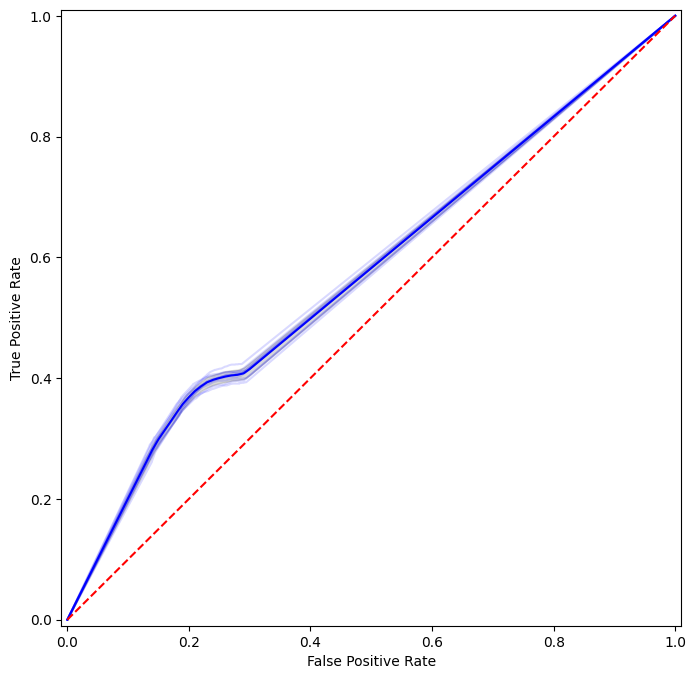

XGBoost:
Accuracy: 0.7987344190336036
Precision: 0.5139900894544807
Recall: 0.06101090180281854
F1 score: 0.10895212383827188
AUC 0.7335391342320435


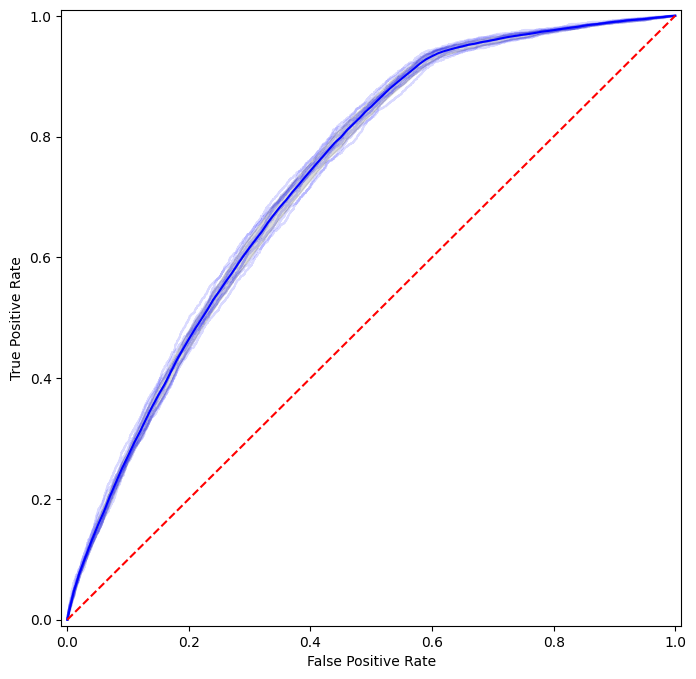

In [26]:
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from scipy import interp
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

results = []
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}
#Build all models using cross validation and calculating metrics
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True) 
    results = model_selection.cross_validate(estimator=model,X = X,y = y,cv=kfold,scoring=scoring)
    msg = "%s:" %(name)
    print(msg)
    print("Accuracy:",results['test_accuracy'].mean())
    print("Precision:",results['test_precision'].mean())
    print("Recall:",results['test_recall'].mean())
    print("F1 score:", results['test_f1_score'].mean())
    tprs = []
    base_fpr = np.linspace(0, 1, 101)

    plt.figure(figsize=(8, 8))

    for i, (train, test) in enumerate(kfold.split(X, y)):
        model = model.fit(X[train], y[train])
        y_score = model.predict_proba(X[test])
        fpr, tpr, _ = roc_curve(y[test], y_score[:, 1])

        plt.plot(fpr, tpr, 'b', alpha=0.15)
        tpr = np.interp(base_fpr, fpr, tpr)
        tpr[0] = 0.0
        tprs.append(tpr)

    tprs = np.array(tprs)
    mean_tprs = tprs.mean(axis=0)
    std = tprs.std(axis=0)
    mean_auc = auc(base_fpr, mean_tprs)
    print("AUC", mean_auc)
    tprs_upper = np.minimum(mean_tprs + std, 1)
    tprs_lower = mean_tprs - std


    plt.plot(base_fpr, mean_tprs, 'b')
    plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3)

    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show() 

In [27]:
#Spliting dataset to build model
from sklearn.model_selection import train_test_split
test_validation = 0.3
random_no = 78
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= test_validation, random_state=random_no)

# 3. Precision, Recall, ROC, AUC metrics

Accuracy: 0.7898235436306502
Precision: 0.3445378151260504
Recall: 0.017969320672023375
F1 score: 0.03415717856151069
AUC:0.6598140210680068


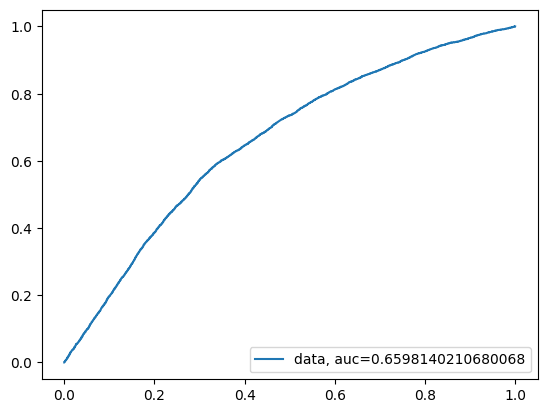

Accuracy: 0.7673132704858593
Precision: 0.3437956204379562
Recall: 0.13761869978086194
F1 score: 0.19655712050078245
AUC:0.6439909889411427


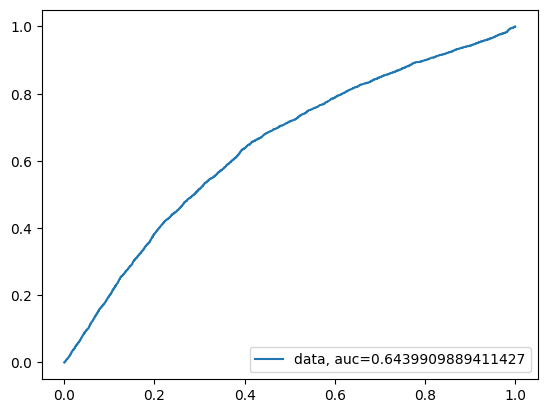

Accuracy: 0.7356175972927242
Precision: 0.3403185247275775
Recall: 0.29656683710737763
F1 score: 0.31693989071038253
AUC:0.5720384898064614


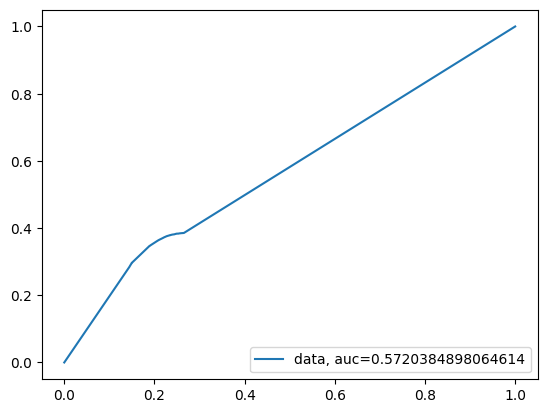

Accuracy: 0.7920292482475224
Precision: 0.47845804988662133
Recall: 0.06165084002921841
F1 score: 0.1092273844959234
AUC:0.7275117920305182


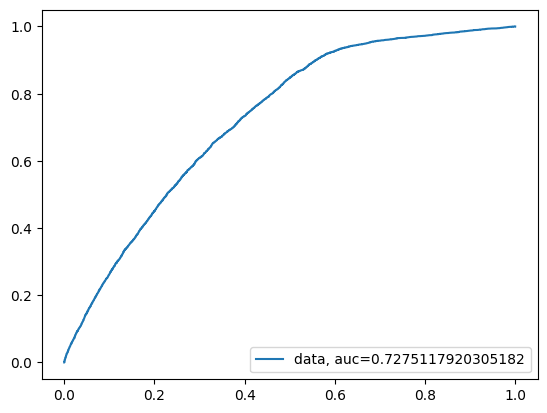

In [28]:
#building models and calculating metrics without cross validation
from sklearn import metrics
for name, model in models:
    this_model = model
    this_model.fit(X_train, y_train)
    y_pred = this_model.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))
    print("F1 score:", metrics.f1_score(y_test, y_pred))
    y_pred_proba = this_model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    print("AUC:"+str(auc))
    plt.plot(fpr,tpr,label="data, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()